In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir('../../')
!pwd

/home/giorgioseveri/projects/advml/lemon


In [11]:
dist_type = ['1', '2', 'inf', 'cos']
human_dist = {'1': 'L-1', '2': 'L-2', 'inf': 'L-inf', 'cos': 'Cosine'}
victim_model = 'densenet161'
proxies = [
    'vgg11_bn',
    'vgg13_bn',
    'vgg16_bn',
    'vgg19_bn',
    'resnet18',
    'resnet34',
    'resnet50',
    'densenet121',
    'densenet169',
    'mobilenet_v2',
    'googlenet',
    'inception_v3'
]
proxies = sorted(proxies)

In [6]:
distances = np.load(
    'results/distances_v_densenet161_p_densenet121_densenet169_googlenet_inception_v3_mobilenet_v2_resnet18_resnet34_resnet50_vgg11_bn_vgg13_bn_vgg16_bn_vgg19_bn.npy',
    allow_pickle=True
).item()
print(distances)

{'densenet121': array([1.96612476e+03, 2.82449207e+01, 2.52590132e+00, 1.40515983e-01]), 'densenet169': array([2.06990967e+03, 2.86825314e+01, 2.47830868e+00, 1.45893633e-01]), 'googlenet': array([3.03888135e+03, 4.14581871e+01, 4.07598114e+00, 2.90385365e-01]), 'inception_v3': array([2.57898657e+03, 3.68407211e+01, 3.72800684e+00, 2.32471168e-01]), 'mobilenet_v2': array([2.44948633e+03, 3.35231857e+01, 3.23099184e+00, 2.10624337e-01]), 'resnet18': array([2.58950366e+03, 3.33723831e+01, 3.02159691e+00, 1.80937469e-01]), 'resnet34': array([2.53413770e+03, 3.32941208e+01, 3.68030453e+00, 1.72077835e-01]), 'resnet50': array([2.39638965e+03, 3.25622787e+01, 3.06440854e+00, 1.60894632e-01]), 'vgg11_bn': array([4.11289209e+03, 4.80049286e+01, 3.67372131e+00, 2.86220431e-01]), 'vgg13_bn': array([3.98184546e+03, 4.69382019e+01, 3.51297927e+00, 2.78246462e-01]), 'vgg16_bn': array([4.12149121e+03, 4.91337700e+01, 4.18421650e+00, 2.88083375e-01]), 'vgg19_bn': array([5.03814160e+03, 6.04839783e+01

In [8]:
transf_densenet121 = 0.42000000000000004
transf_densenet169 = 0.52
transf_googlenet = 0.10999999999999999
transf_inception_v3 = 0.06999999999999995
transf_mobilenet_v2 = 0.22999999999999998
transf_resnet18 = 0.4
transf_resnet34 = 0.39
transf_resnet50 = 0.35
transf_vgg11_bn = 0.25
transf_vgg13_bn = 0.18999999999999995
transf_vgg16_bn = 0.12
transf_vgg19_bn = 0.08999999999999997
transfers = [
    transf_densenet121, transf_densenet169, transf_googlenet, transf_inception_v3,
    transf_mobilenet_v2, transf_resnet18, transf_resnet34, transf_resnet50,
    transf_vgg11_bn, transf_vgg13_bn, transf_vgg16_bn, transf_vgg19_bn
]

In [9]:
# Create a single dataframe containing all the results
results = []
for i, p in enumerate(proxies):
    res = {'victim': victim_model, 'proxy': p, 'transfer': transfers[i]}
    for j, d in enumerate(dist_type):
        res['dist_{}'.format(d)] = distances[p][j]
    results.append(res)
res_df = pd.DataFrame.from_dict(results) 

In [10]:
res_df

,victim,proxy,transfer,dist_1,dist_2,dist_inf,dist_cos
0,densenet161,densenet121,0.42,1966.124756,28.244921,2.525901,0.140516
1,densenet161,densenet169,0.52,2069.909668,28.682531,2.478309,0.145894
2,densenet161,googlenet,0.11,3038.881348,41.458187,4.075981,0.290385
3,densenet161,inception_v3,0.07,2578.986572,36.840721,3.728007,0.232471
4,densenet161,mobilenet_v2,0.23,2449.486328,33.523186,3.230992,0.210624
5,densenet161,resnet18,0.40,2589.503662,33.372383,3.021597,0.180937
6,densenet161,resnet34,0.39,2534.137695,33.294121,3.680305,0.172078
7,densenet161,resnet50,0.35,2396.389648,32.562279,3.064409,0.160895
8,densenet161,vgg11_bn,0.25,4112.892090,48.004929,3.673721,0.286220
9,densenet161,vgg13_bn,0.19,3981.845459,46.938202,3.512979,0.278246


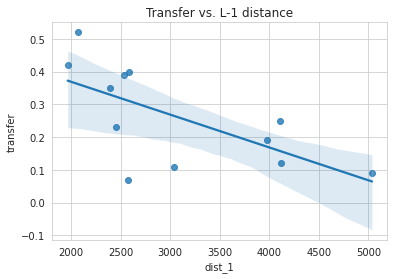

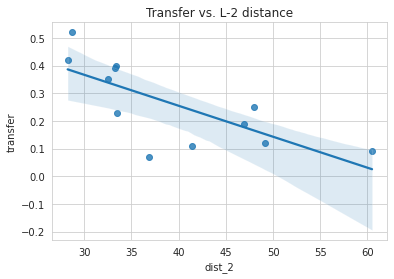

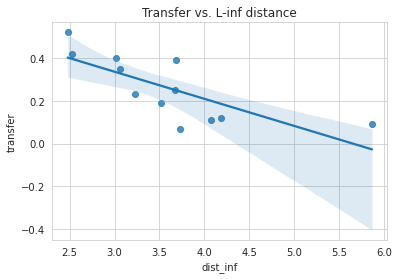

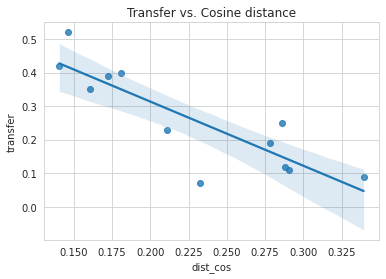

In [14]:
sns.set_style('whitegrid')

for d in dist_type:
    distance = 'dist_{}'.format(d)
    s = sns.regplot(data=res_df, y='transfer', x=distance)
    s.set(title='Transfer vs. {} distance'.format(human_dist[d]))
    plt.show()